Importing library

In [37]:
import numpy as np #for arrays
import pandas as pd #for dataframe
import matplotlib.pyplot as plt #making plots and graphs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [10]:
#Loading the csv data to Pandas DataFrame
gold_data = pd.read_csv('Gold.csv')

In [11]:
#print firs 5 rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
#print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
#number of frame
gold_data.shape

(2290, 6)

In [14]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
#checking the number of missing values
gold_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date    SPX    GLD    USO    SLV  EUR/USD
0     False  False  False  False  False    False
1     False  False  False  False  False    False
2     False  False  False  False  False    False
3     False  False  False  False  False    False
4     False  False  False  False  False    False
...     ...    ...    ...    ...    ...      ...
2285  False  False  False  False  False    False
2286  False  False  False  False  False    False
2287  False  False  False  False  False    False
2288  False  False  False  False  False    False
2289  False  False  False  False  False    False

[2290 rows x 6 columns]>

In [16]:
#getting statstical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# CORRELATION BETWEEN THE VARIOUS DATASET

Positive correlation
Negative correlation

In [18]:
#find correlation
correlation = gold_data.corr()

<AxesSubplot:>

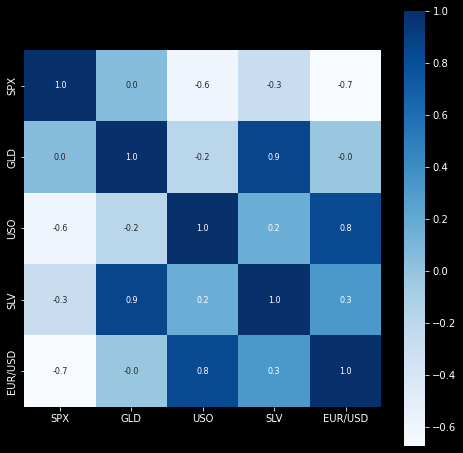

In [26]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Kunal\AppData\Local\Temp\ipykernel_19036\2557223457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<AxesSubplot:xlabel='GLD', ylabel='Density'>

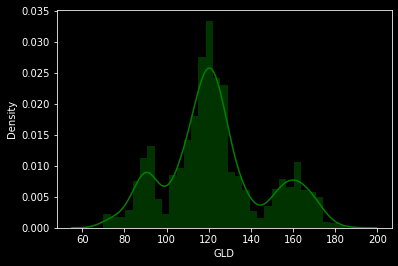

In [29]:
#check the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [31]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [32]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [33]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Train Data and Teat Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

# Model Training: Random Forest Regressor

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
#train the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [40]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.60199951  81.88939981 116.00749999 127.68430067 120.5752012
 154.79189759 150.35839853 126.0734002  117.43019892 125.89720085
 116.72650084 171.83980055 141.94369802 167.80859846 115.26459991
 117.57760046 141.50340242 169.92570043 160.20600335 156.86569908
 155.09380032 125.33340046 176.30229944 156.89580324 125.2164004
  94.06289981  77.61789992 120.7106999  119.08819931 167.48449968
  88.1924003  125.04809988  90.80540054 117.58430002 121.16889914
 136.78830102 115.46040128 115.18450068 148.95980029 107.12200114
 104.30020227  87.21599792 126.50050064 117.89970006 153.35049897
 119.72540016 108.32459977 108.21619841  93.08400023 127.16599768
  74.88480014 113.52009877 121.38940006 111.3463991  118.70939874
 120.64509938 159.12419962 169.588201   146.70549665  85.85169845
  94.32990031  86.93429881  90.69310033 119.06220069 126.40200093
 127.69020036 170.91210005 122.38979933 117.25639882  98.37780032
 168.40310199 143.03499856 131.49260266 121.12980187 120.60619938
 119.7194003

In [43]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9884315227862317


## Compare actual values and predicted values in plot

In [44]:
Y_test = list(Y_test)

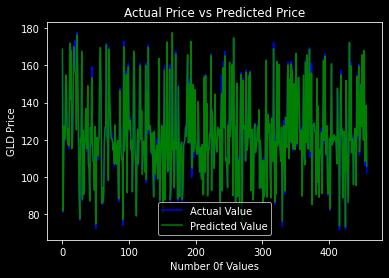

In [45]:
plt.plot(Y_test, color = 'blue',label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number 0f Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()